<a href="https://colab.research.google.com/github/mudassir-ahmed-10/DOG-BREED-IDENTIFICATION_/blob/main/Dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!unzip "drive/MyDrive/Dog-vision-dataset/dog-breed-identification.zip" -d "drive/MyDrive/Dog-vision-dataset/"

### My WorkSpace
* import tenserflow 
* import tensorflow hub
* make sure we are using gpu

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub  

print("tf.version:", tf.__version__)
print("hub_version:", hub.__version__)

print("Gpu Avalability", "Avalable: yesss!!!" if tf.config.list_logical_devices("GPU") else "no :(")

tf.version: 2.4.1
hub_version: 0.12.0
Gpu Avalability Avalable: yesss!!!


## Getting you data ready(turning into tensors)
 
 we will be turning our images into tensors

In [ ]:
##getting the lables

import pandas as pd

labels_csv = pd.read_csv("/content/drive/MyDrive/Dog-vision-dataset/labels.csv")

print(labels_csv.describe())
labels_csv.head(5)

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     7c81c036681a8b60fab534481c5719cf  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

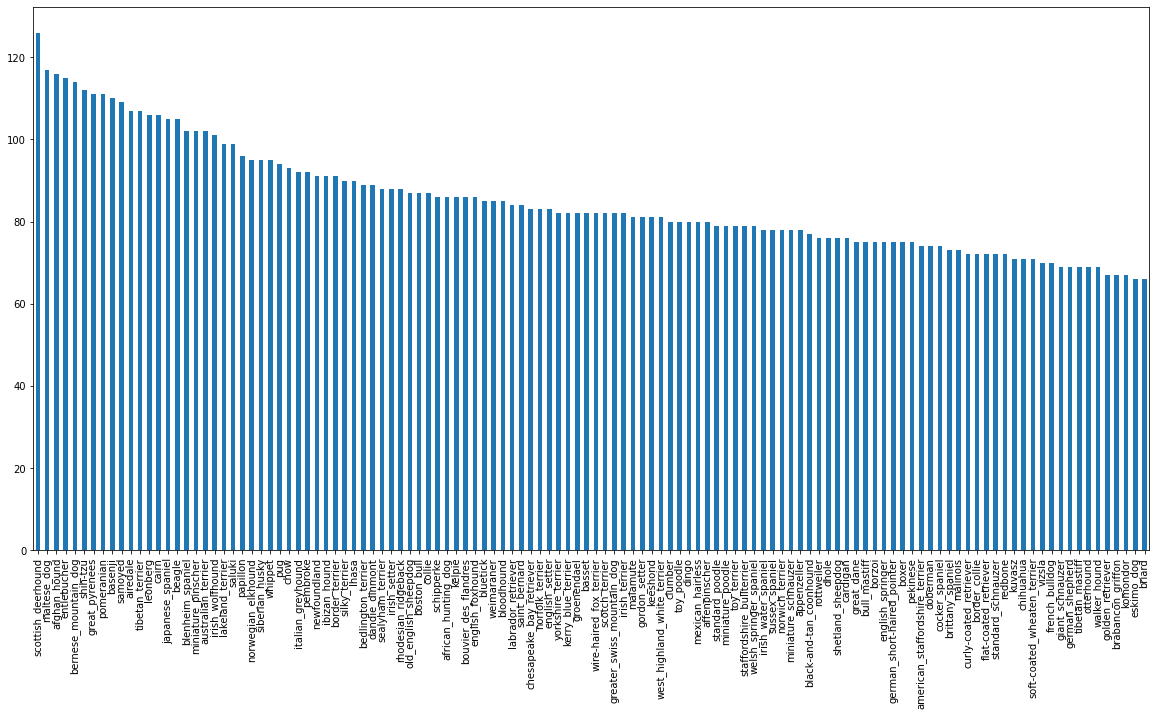

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize = (20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

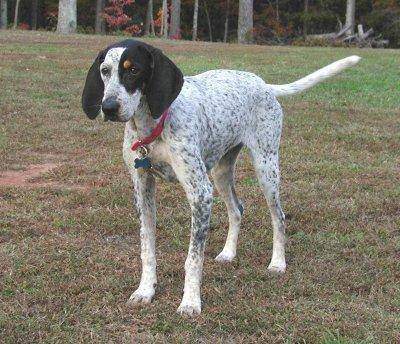

In [ ]:
## lets see the a particular dog image
from IPython.display import Image

Image("/content/drive/MyDrive/Dog-vision-dataset/train/00214f311d5d2247d5dfe4fe24b2303d.jpg")

## Getting Your images and their labels ready

get a list of all image pathnames

In [ ]:
## getting the paathnames from image ids

filename = ["/content/drive/MyDrive/Dog-vision-dataset/train/" + fname + ".jpg" for fname in labels_csv["id"]]

filename[:10]

['/content/drive/MyDrive/Dog-vision-dataset/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog-vision-dataset/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog-vision-dataset/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog-vision-dataset/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog-vision-dataset/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog-vision-dataset/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog-vision-dataset/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog-vision-dataset/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog-vision-dataset/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog-vision-dataset/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

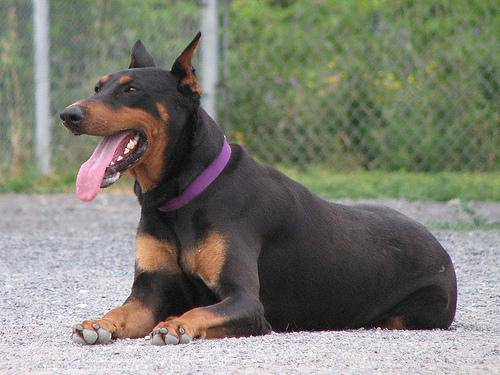

In [ ]:
Image(filename[20])

In [ ]:
labels_csv["breed"][20]

'doberman'

In [ ]:
import os

if len(os.listdir("/content/drive/MyDrive/Dog-vision-dataset/train")) == len(filename):
  print("both have same no.of images. Proceed")
else: 
  print("check once again")

both have same no.of images. Proceed


lets us prepare our lables

In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
if len(labels)== len(filename):
  print("Hurray no missing values")
else:
  print("we need to work on missing values :(")

Hurray no missing values


In [ ]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
## gathering all the labels

boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
##converting the boolean format into integers

print(boolean_labels[0].astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


##Creating a validation set

In [ ]:
## gets your x and y variable

x = filename
y = boolean_labels

In [ ]:
print(len(x))
print(len(y))

10222
10222


In [ ]:
## since we have of lots of make a parameter

NUM_IMAGES = 1000 #@param {type : "slider", min:1000, max:10000, step:1000 }

In [ ]:
##spliting into train test split
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state = 42)
print(len(x_train)),print(len(y_train))
len(x_val), len(y_val)

800
800


(200, 200)

In [ ]:
x_train[:5], y_train[:2]

(['/content/drive/MyDrive/Dog-vision-dataset/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Dog-vision-dataset/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/Dog-vision-dataset/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/Dog-vision-dataset/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/Dog-vision-dataset/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, F

## Preprocess the image into tensors
To prprocess the images we will write a function that will convert the images into tensors

1. Take a image filepath as input
2. Use tensorflow to read the file and save it to a variable, `image`
3. Turn the variable `image` into tensors
4. Resize the image into (244, 244)
5. Return the modified `image`. 

In [ ]:
from matplotlib.pyplot import imread

image = imread(filename[4])
print(image.shape)
image[:2]

(500, 500, 3)


array([[[85, 87, 84],
        [85, 87, 84],
        [85, 87, 84],
        ...,
        [78, 84, 80],
        [78, 84, 80],
        [78, 84, 80]],

       [[83, 85, 82],
        [83, 85, 82],
        [83, 85, 82],
        ...,
        [78, 84, 80],
        [78, 84, 80],
        [78, 84, 80]]], dtype=uint8)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[85, 87, 84],
        [85, 87, 84],
        [85, 87, 84],
        ...,
        [78, 84, 80],
        [78, 84, 80],
        [78, 84, 80]],

       [[83, 85, 82],
        [83, 85, 82],
        [83, 85, 82],
        ...,
        [78, 84, 80],
        [78, 84, 80],
        [78, 84, 80]]], dtype=uint8)>

## Function to change images to tensors and risize them

In [ ]:
##define img_size
IMG_SIZE = 244

##the fuction to change the image to tensors

def process_image(image_path, img_size = IMG_SIZE):
  """
  This function will take the image path as values and convert them to tensors and then return them
  """
  #reads the image
  image = tf.io.read_file(image_path)
  #decode the image into three color channels
  image = tf.image.decode_jpeg(image, channels = 3)
  ##normalize the data
  image = tf.image.convert_image_dtype(image, tf.float32)
  #resize the image
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image


## Turning our data into batches


In [ ]:
## Functions to return a tuple

def get_image_lable(image_path, label):
  """
  takes a image file name and associated label, preprocess them 
  and return  tuple of (image, label)
  """
  image = process_image(image_path)
  return image, label

lets turn the tuples into batches 

In [ ]:
#define a batch size
BATCH_SIZE = 32

# create a function that turns data into batches

def create_data_batches( x, y=None, batch_size=BATCH_SIZE, valid_data= False, test_data= False):
  """
  creates batches of data out of images (x) and labels (y)
  shuffles the data if it training data in other cases it doesn't
  also accepts test data as input  
  """

  if test_data:
    print("Creating Test Data Batches......")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(x))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  elif valid_data:
    print("Creating Valid Data Batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data_batch = data.map(get_image_lable).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating Train Data Batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data = data.shuffle(buffer_size = len(x))
    data_batch = data.map(get_image_lable).batch(BATCH_SIZE)
  
  return data_batch



In [ ]:
train_data = create_data_batches(x_train, y_train,)
valid_data = create_data_batches(x_val, y_val, valid_data = True)

Creating Train Data Batches....
Creating Valid Data Batches....


In [ ]:
train_data, valid_data

(<BatchDataset shapes: ((None, 244, 244, 3), (None, 120)), types: (tf.float32, tf.bool)>,
 <BatchDataset shapes: ((None, 244, 244, 3), (None, 120)), types: (tf.float32, tf.bool)>)

vavalidvalidva;oidassaaaaaaaaaasaaasdsdasdasdasdaqqwq##Visualize the Data


In [ ]:
import matplotlib.pyplot as plt

# create a function that shows 25 images of dogs 

def show_25_images(images, labels):
  """
  displays a plot consisting of 25 images and their respective images
  """

  plt.figure(figsize = (10, 10))

  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")


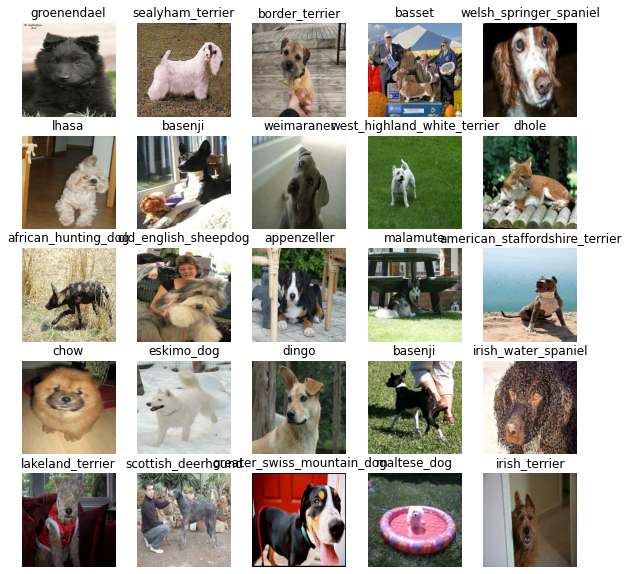

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

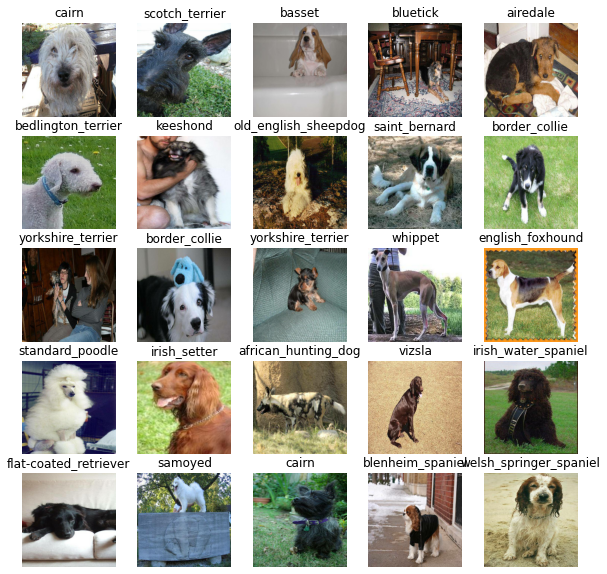

In [ ]:
valid_images, valid_labels = next(valid_data.as_numpy_iterator())
show_25_images(valid_images, valid_labels)

## Train the model


##Creating and training a model
Now our data is ready, let's prepare it modelling. We'll use an existing model from TensorFlow Hub.

TensorFlow Hub is a resource where you can find pretrained machine learning models for the problem you're working on.

Using a pretrained machine learning model is often referred to as transfer learning.

###Why use a pretrained model?
Building a machine learning model and training it on lots from scratch can be expensive and time consuming.

Transfer learning helps eliviate some of these by taking what another model has learned and using that information with your own problem.

###How do we choose a model?
Since we know our problem is image classification (classifying different dog breeds), we can navigate the TensorFlow Hub page by our problem domain (image).

We start by choosing the image problem domain, and then can filter it down by subdomains, in our case, image classification.

Doing this gives a list of different pretrained models we can apply to our task.

Clicking on one gives us information about the model as well as instructions for using it.

For example, clicking on the mobilenet_v2_130_224 model, tells us this model takes an input of images in the shape 224, 224. It also says the model has been trained in the domain of image classification.


In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
## setup the input shape of the model
INPUT_SHAPE = [None, 244, 244, 3]

##setup the output shape of the model
OUTPUT_SHAPE = len(unique_breeds)
 
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we've got the inputs, outputs and model we're using ready to go. We can start to put them together

There are many ways of building a model in TensorFlow but one of the best ways to get started is to use the Keras API.

Defining a deep learning model in Keras can be as straightforward as saying, "here are the layers of the model, the input shape and the output shape, let's go!"

Knowing this, let's create a function which:

<li>Takes the input shape, output shape and the model we've chosen's URL as parameters.
<li>Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
<li>Compiles the model (says how it should be evaluated and improved).
<li>Builds the model (tells it what kind of input shape it'll be getting).
<li>Returns the model.
We'll take a look at the code first, then dicuss each part.

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

**What's happening here?**

**Setting up the model layers**
There are two ways to do this in Keras, the functional and sequential API. We've used the sequential.

Which one should you use?

The Keras documentation states the functional API is the way to go for defining complex models but the sequential API (a linear stack of layers) is perfectly fine for getting started, which is what we're doing.

The first layer we use is the model from TensorFlow Hub (hub.KerasLayer(MODEL_URL). So our first layer is actually an entire model (many more layers). This input layer takes in our images and finds patterns in them based on the patterns mobilenet_v2_130_224 has found.

The next layer (tf.keras.layers.Dense()) is the output layer of our model. It brings all of the information discovered in the input layer together and outputs it in the shape we're after, 120 (the number of unique labels we have).

The activation="softmax" parameter tells the output layer, we'd like to assign a probability value to each of the 120 labels somewhere between 0 & 1. The higher the value, the more the model believes the input image should have that label. If we were working on a binary classification problem, we'd use activation="sigmoid".

For more on which activation function to use, see the article Which Loss and Activation Functions Should I Use?

**Building the model**

We use model.build() whenever we're using a layer from TensorFlow Hub to tell our model what input shape it can expect.

In this case, the input shape is [None, IMG_SIZE, IMG_SIZE, 3] or [None, 224, 224, 3] or [batch_size, img_height, img_width, color_channels].

Batch size is left as None as this is inferred from the data we pass the model. In our case, it'll be 32 since that's what we've set up our data batches as.

Now we've gone through each section of the function, let's use it to create a model.

We can call summary() on our model to get idea of what our model looks like.

In [ ]:

# Create a model and check its details
model = create_model()
model.summary()

##Creating callbacks
We've got a model ready to go but before we train it we'll make some callbacks.

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

The two callbacks we're going to add are a TensorBoard callback and an Early Stopping callback.

###TensorBoard Callback
TensorBoard helps provide a visual way to monitor the progress of your model during and after training.

It can be used directly in a notebook to track the performance measures of a model such as loss and accuracy.

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:

1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.
3. Visualize the our models training logs using the %tensorboard magic function (we'll do this later on).

In [ ]:

# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

**Early Stopping Callback**
Early stopping helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).

It's basically like saying to our model, "keep finding patterns until the quality of those patterns starts to go down."

In [ ]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

##Training a model (on a subset of data)
Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data.

We do this to make sure everything is working. And if it is, we can step it up later and train on the entire training dataset.

The final parameter we'll define before training is NUM_EPOCHS (also known as number of epochs).




 **Let's create a simple function which trains a model. The function will:**

<li>Create a model using create_model().
<li>Setup a TensorBoard callback using create_tensorboard_callback() (we do this here so it creates a log directory of the current date and time).
<li>Call the fit() function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
<li>Return the fitted model.

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [ ]:
# Fit the model to the data
model = train_model()

In [ ]:
%tensorboard --logdir drive/My\ Drive/Data/logs

##Making and evaluating predictions using a trained model
Before we scale up and train on more data, let's see some other ways we can evaluate our model. Because although accuracy is a pretty good indicator of how our model is doing, it would be even better if we could could see it in action.

Making predictions with a trained model is as calling predict() on it and passing it data in the same format the model was trained on.



In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

In [ ]:
# Check the shape of predictions
predictions.shape

In [ ]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

Now we've got ways to get:

Prediction labels
Validation labels (truth labels)
Validation images
Let's make some functions to make these all a bit more visualize.

More specifically, we want to be able to view an image, its predicted label and its actual label (true label).

The first function we'll create will:

Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
Convert the prediction probabilities to a predicted label.
Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

In [ ]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

Since we're working with a multi-class problem (120 different dog breeds), it would also be good to see what other guesses our model is making. More specifically, if our model predicts a certain label with 24% probability, what else did it predict?

**Let's build a function to demonstrate. The function will:**

<li>Take an input of a prediction probabilities array, a ground truth labels array and an integer.
<li>Find the predicted label using get_pred_label().
<li>Find the top 10:
<li>Prediction probabilities indexes
<li>Prediction probabilities values
<li>Prediction labels
<li>Plot the top 10 prediction probability values and labels, coloring the true label green.

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

In [ ]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

##Saving and reloading a model
After training a model, it's a good idea to save it. Saving it means you can share it with colleagues, put it in an application and more importantly, won't have to go through the potentially expensive step of retraining it.

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-dog")

In [ ]:
# Load our model trained on 1000 images
model_1000_images = load_model('drive/My Drive/Data/models/20200131-02551580439347-1000-images-dog.h5')

In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

In [ ]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

##Training a model (on the full data)
Now we know our model works on a subset of the data, we can start to move forward with training one on the full data.

Above, we saved all of the training filepaths to X and all of the training labels to y. Let's check them out.

In [ ]:
# Remind ourselves of the size of the full dataset
len(X), len(y)

In [ ]:
# Turn full training data in a data batch
full_data = create_data_batches(X, y)

In [ ]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

In [ ]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
%tensorboard --logdir drive/My\ Drive/Data/logs

In [ ]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])